Get rid of the smell!

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [4]:
def initialize_params(n_features, random_state=np.random):
    bias = 0.0
    weights = random_state.randn(n_features) * 0.001
    return weights, bias


def train(weights, bias, learning_rate, n_iterations, X, y):
    costs = []
    for idx in range(n_iterations):
        weights, bias, cost = update(weights, bias, learning_rate, X, y)
        costs.append(cost)
    return weights, bias, costs


def update(weights, bias, learning_rate, X, y):
    output = activation(weights, bias, X)
    errors = y - output
    weights = weights + learning_rate * X.T.dot(errors)
    bias = bias + learning_rate * errors.sum()
    cost = (errors ** 2).sum() / 2.0
    return weights, bias, cost


def activation(weights, bias, X):
  """Compute linear activation"""
  return np.dot(X, weights) + bias


def predict(weights, bias, X):
  """Return class label after unit step"""
  return np.where(activation(weights, bias, X) >= 0.0, 1, -1)


In [5]:
from sklearn import datasets

iris = datasets.load_iris()
two_classes_mask = iris.target < 2
X = iris.data[two_classes_mask]
y = iris.target[two_classes_mask]
y[y==0] = -1

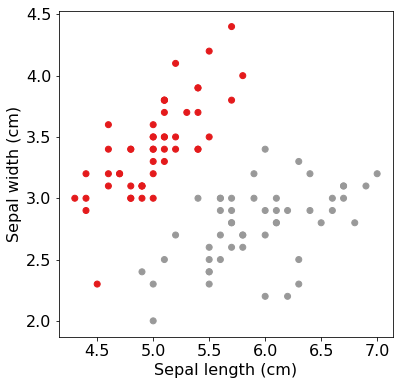

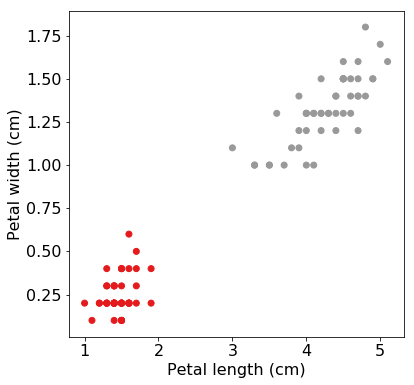

In [6]:
with plt.rc_context(rc={'figure.figsize': (6, 6), 'font.size': 16}):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())
    plt.show()

    plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1)
    plt.xlabel(iris.feature_names[2].capitalize())
    plt.ylabel(iris.feature_names[3].capitalize());


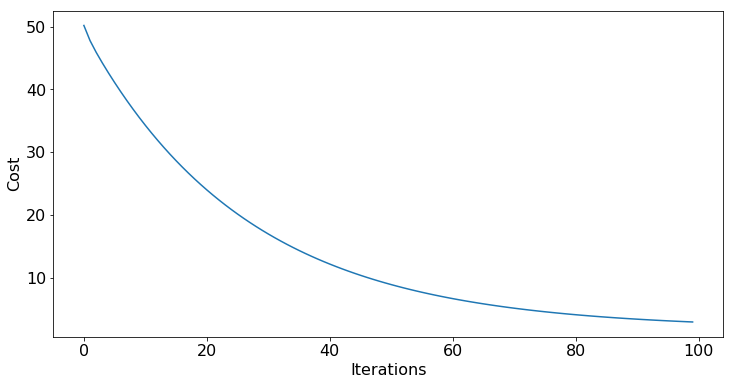

In [7]:
random_state = np.random.RandomState(783838)

weights , bias = initialize_params(n_features=X.shape[1], random_state=random_state)

learning_rate = 0.0001
n_iterations = 100
weights, bias, costs = train(weights, bias, learning_rate, n_iterations, X, y)

with plt.rc_context(rc={'figure.figsize': (12, 6), 'font.size': 16}):
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

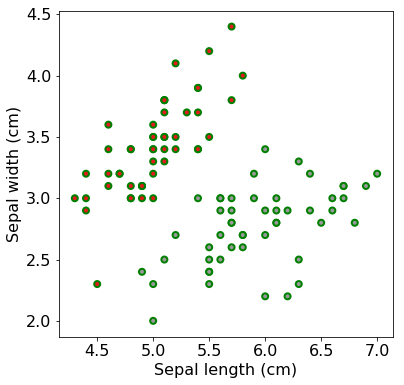

In [8]:
predicted = predict(weights, bias, X)
correct = predicted == y
marker = np.where(correct, 'o', 'x')

with plt.rc_context(rc={'figure.figsize': (6, 6), 'font.size': 16}):
    plt.scatter(X[correct, 0], X[correct, 1], c=y[correct], cmap=plt.cm.Set1, marker='o', edgecolors='g', linewidths=2.0)
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())

    plt.scatter(X[~correct, 0], X[~correct, 1], c=y[~correct], marker='o', edgecolors='r')
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())


# Intermediate step: parameters class, no methods

# With methods

In [10]:
class Perceptron:
    def __init__(self, bias, weights):
        self.bias = bias
        self.weights = weights
    
    @classmethod
    def random_init(cls, n_features, random_state=np.random):
        weights = random_state.randn(n_features) * 0.001
        return cls(bias=0.0, weights=weights)

    def update(self, learning_rate, X, y):
        output = activation(self.weights, self.bias, X)
        errors = y - output
        self.weights = self.weights + learning_rate * X.T.dot(errors)
        self.bias = self.bias + learning_rate * errors.sum()
        cost = (errors ** 2).sum() / 2.0
        return cost
    
    def activation(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
      """Return class label after unit step"""
      return np.where(activation(self.weights, self.bias, X) >= 0.0, 1, -1)


def fixed_rate_training(perceptron, learning_rate, n_iterations, X, y):
    costs = []
    for idx in range(n_iterations):
        cost = perceptron.update(learning_rate, X, y)
        costs.append(cost)
    return costs


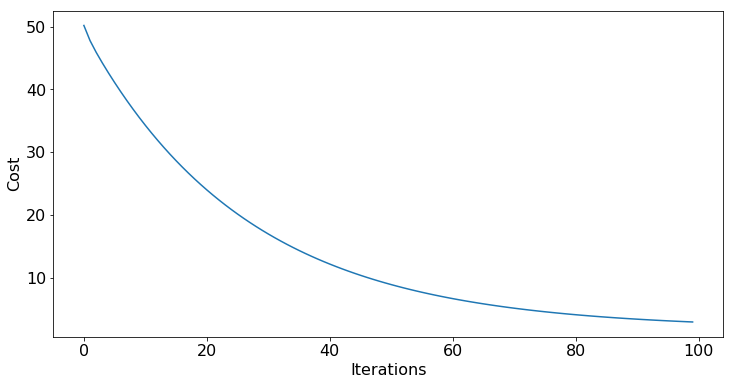

In [12]:
random_state = np.random.RandomState(783838)

perceptron = Perceptron.random_init(n_features=X.shape[1], random_state=random_state)

learning_rate = 0.0001
n_iterations = 100
costs = fixed_rate_training(perceptron, learning_rate, n_iterations, X, y)

with plt.rc_context(rc={'figure.figsize': (12, 6), 'font.size': 16}):
    plt.plot(costs)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

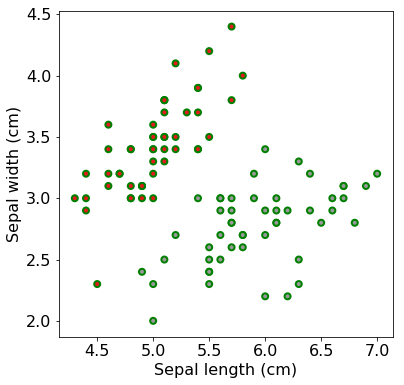

In [13]:
predicted = perceptron.predict(X)
correct = predicted == y
marker = np.where(correct, 'o', 'x')

with plt.rc_context(rc={'figure.figsize': (6, 6), 'font.size': 16}):
    plt.scatter(X[correct, 0], X[correct, 1], c=y[correct], cmap=plt.cm.Set1, marker='o', edgecolors='g', linewidths=2.0)
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())

    plt.scatter(X[~correct, 0], X[~correct, 1], c=y[~correct], marker='o', edgecolors='r')
    plt.xlabel(iris.feature_names[0].capitalize())
    plt.ylabel(iris.feature_names[1].capitalize())


# Add serialization